In [61]:
import pandas as pd
import nltk
nltk.download("punkt")
from nltk.corpus import stopwords
nltk.download("stopwords")
import seaborn as sns
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package punkt to C:\Users\Mehul
[nltk_data]     Rajesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mehul
[nltk_data]     Rajesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
data=pd.read_csv("spam.csv",encoding="latin-1")

In [63]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [64]:
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [65]:
data.shape

(5572, 2)

<Axes: xlabel='v1', ylabel='count'>

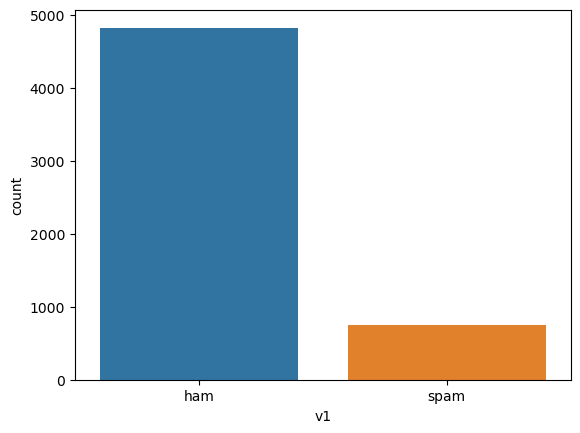

In [66]:
sns.countplot(x="v1",data=data)

In [67]:
ham=data[data.v1=="ham"]
spam=data[data.v1=="spam"]
ham=ham.sample(n=len(spam),random_state=1)
df=pd.concat([ham,spam],axis=0).reset_index(drop=True)

<Axes: xlabel='v1', ylabel='count'>

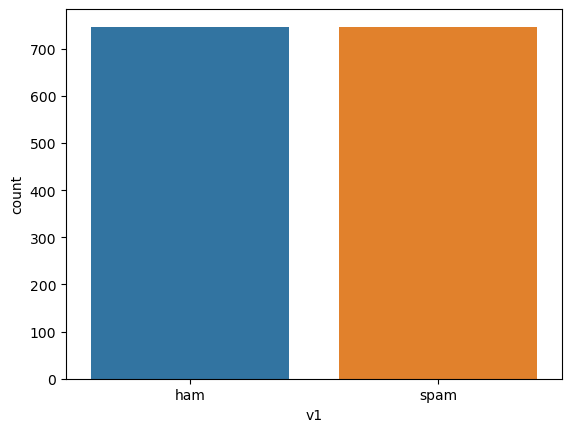

In [68]:
sns.countplot(x="v1",data=df)

In [69]:
df.shape

(1494, 2)

In [70]:
def preprocessing(df):
    stop_words=set(stopwords.words("english"))
    for i in range(len(df)):
        words=nltk.word_tokenize(df.v2[i])
        cleanedwords=[word for word in words if word.isalnum() if word not in stop_words]
        df.at[i,"v2"]=" ".join(cleanedwords)
preprocessing(df)

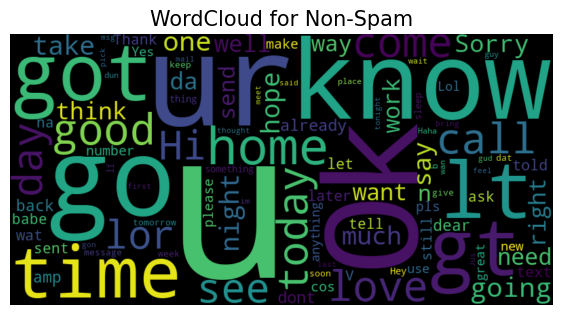

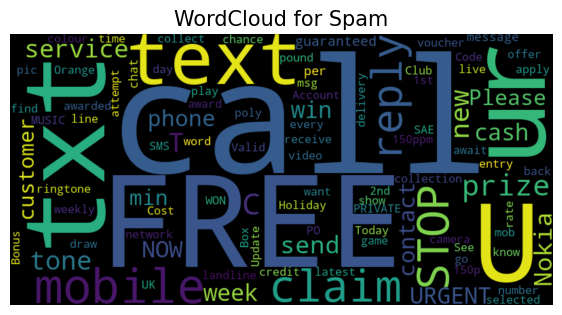

In [71]:
def wordclouds(df,type):
    text=" ".join(df["v2"])
    plt.figure(figsize=(7,7))
    wc = WordCloud(background_color='black',max_words=100,width=800,height=400,collocations=False).generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {type}', fontsize=15)
    plt.axis('off')
    plt.show()
wordclouds(df[df['v1']=="ham"], type='Non-Spam')
wordclouds(df[df['v1']=="spam"], type='Spam')

In [72]:
encoder=LabelEncoder()
df.v1=encoder.fit_transform(df.v1)
df.head()

,v1,v2
0,0,Can pls pls send mail know relatives coming de...
1,0,Yeah probably sure Ilol let u know personally ...
2,0,Were gon na go get tacos
3,0,Hi Hope good day Have better night
4,0,How much r willing pay


In [73]:
x_train,x_test,y_train,y_test=train_test_split(df['v2'],df['v1'],test_size=0.2,random_state=42)
vectorizer=TfidfVectorizer(max_features=1000,stop_words='english')
x_train_tfidf=vectorizer.fit_transform(x_train)
x_test_tfidf=vectorizer.transform(x_test)

In [74]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(x_train_tfidf,y_train)

GradientBoostingClassifier()

In [75]:
y_pred = model.predict(x_test_tfidf)


In [60]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       145
           1       0.97      0.82      0.89       154

    accuracy                           0.89       299
   macro avg       0.90      0.90      0.89       299
weighted avg       0.90      0.89      0.89       299



In [76]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(x_train_tfidf,y_train)
y_pred = classifier.predict(x_test_tfidf)

In [77]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       145
           1       0.96      0.89      0.93       154

    accuracy                           0.93       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299

